# Contributing Factors Analysis

## README

### Overview
This notebook analyses various spatial datasets that may contribute to or correlate with nitrogen dioxide (NO₂) pollution levels in Ethiopia (Addis Ababa) and Iraq (Baghdad). It focuses on road infrastructure, points of interest (POIs), active fire product and population distribution as potential explanatory variables.

### Objective
The goal is to examine the spatial distribution of key human and infrastructural factors that may influence or correlate with nitrogen dioxide (NO₂) pollution levels in urban areas.

### Workflow

1. **Data Acquisition**
   - Downloads datasets from multiple sources:
     - OpenStreetMap (OSM) for roads, industrial facilities, and POIs for [Ethiopia](https://download.geofabrik.de/africa/ethiopia-latest-free.shp.zip) and [Iraq](https://download.geofabrik.de/asia/iraq-latest-free.shp.zip)
     - [WorldPop](https://data.humdata.org/search?q=Spatial+Distribution+of+Population+&ext_search_source=main-nav) for population density
     - [MODIS/VIIRS datasets](https://www.earthdata.nasa.gov/data/instruments/viirs) for fire events
   - Imports country and city boundary shapefiles for Ethiopia and Iraq.

2. **Data Processing**
   - Clips all spatial layers to city-level boundaries. 
   - Aggregates various indicators into uniform mesh grids for spatial comparison.

3. **Visualisation**
   - Generates static maps of population density, road infrastructure, and fire event distribution.
   - Visualises spatial variation in contributing factors to support exploratory analysis.

### Outputs

- **Processed Shapefiles**: City-level road, POI, fire, and infrastructure layers.
- **Mesh-Based Aggregated Tables**: Feature counts and densities per grid cell.
- **Static Visualisations**: Choropleth maps for all contributing factors to aid spatial interpretation.
- **Harmonised Datasets**: All outputs aligned spatially and ready for merging with NO₂ concentration data.

## 0 Prepare Packages

In [1]:
# ! pip install pandas osmnx geopandas osm2geojson requests urllib3 shapely matplotlib rasterstats numpy rasterio pyarrow

## OSM Data Process Pipeline

In [1]:
# -----------------------------------------------------------------------------
# STANDARD PATH INITIALISATION (borrowed from Notebook 1)
# -----------------------------------------------------------------------------
from pathlib import Path
import sys
import geopandas as gpd

CURR_PATH = Path().resolve()            # current file path
REPO_PATH = CURR_PATH.parent            # current repository path
DATA_PATH = REPO_PATH / "data"          # path for saving the data
DEMO_PATH = DATA_PATH / "demo-data"     # path for demo purpose 

SRC_PATH = REPO_PATH / "src"    # path for other sources
sys.path.append(str(SRC_PATH))  # add src to system path to import custom functions

# -----------------------------------------------------------------------------
# IMPORT OSM‐ENRICHMENT AND VISUALISATION HELPERS
# -----------------------------------------------------------------------------
from osmstats import batch_write
#from visualization import plot_mesh_static
from visualization import plot_mesh

# Import customised scripts
from aggregation import*
from missingvalue import*
from visualization import*
from osmstats import*

### Addis Ababa

DEFINE STATIC OSM PARAMETERS

In [2]:
# Eight relevant POIs
relevant_poi = [
    "supermarket",
    "hospital",
    "car_dealership",
    "car_rental",
    "car_wash",
    "marketplace",
    "mall",
    "university"
]

# Land‐use categories of interest
landuse_classes = [
    "industrial",
    "commercial",
    "residential",
    "retail",
    "farmland",
    "farmyard"
]

PATHS FOR ADDIS ABABA

In [3]:
addis_mesh_in  = DATA_PATH / "addis-empty-mesh-data"
addis_mesh_out = DATA_PATH / "addis-OSM-mesh-data"
addis_osm      = DATA_PATH / "OSM" / "ethiopia-latest-free.shp"
ethiopia_pp_path = DATA_PATH / "Power Plants" / "ethiopia_power_fossil.gpkg"

ENRICH ADDIS ABABA — writes ~730 files to addis-OSM-mesh-data

In [5]:
batch_write(
    city="addis",
    mesh_folder_in=addis_mesh_in,
    mesh_folder_out=addis_mesh_out,
    osm_shapefile=addis_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes,
    fossil_pp_path=ethiopia_pp_path
)

[addis]  ✓ Saved demo mesh: addis-2023-01-01.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-01.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-02.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-03.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-04.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-05.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-06.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-07.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-08.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-09.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-10.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-11.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-12.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-13.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-14.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-01-15.gpkg
[addis]  ✓ Wrote enriched mesh: addis-ababa-2023-0

Cell “Plot the 2023-01-01 Demo Mesh for QA”

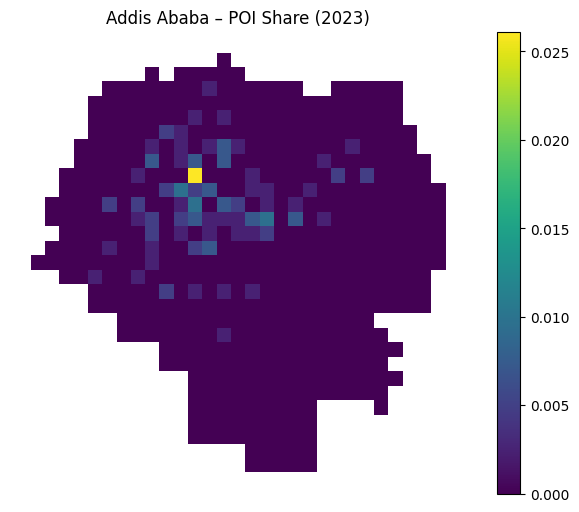

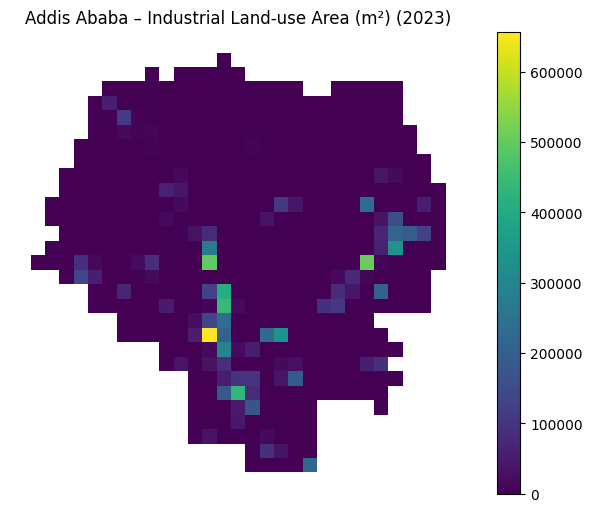

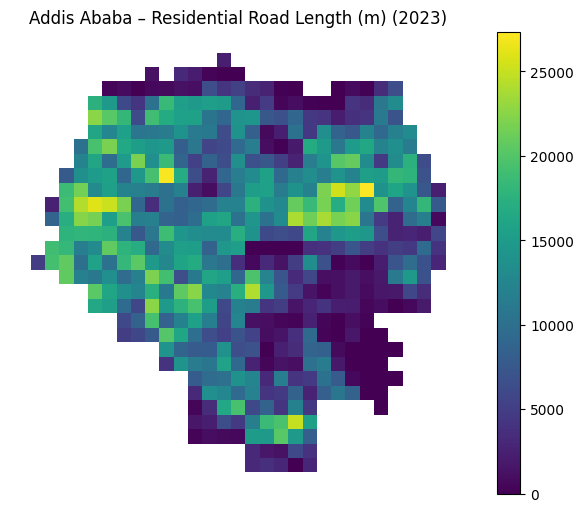

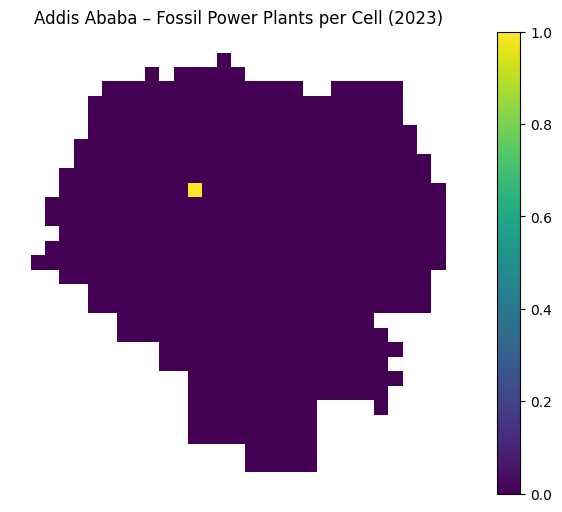

<Axes: title={'center': 'Addis Ababa – Fossil Power Plants per Cell (2023)'}>

In [9]:
demo_dir = DATA_PATH / "demo-data"
#  → “addis-2023-01-01.gpkg” and “baghdad-2023-01-01.gpkg” now exist

# ─── Load the single Addis mesh for QA ────────────────────────────────────────
gdf_addis = gpd.read_file(demo_dir / "addis-ababa-2023-01-01.gpkg")

# POI Share
plot_mesh(
    mesh    = gdf_addis,
    feature = "poi_share",
    title   = "Addis Ababa – POI Share (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land‐use Area
plot_mesh(
    mesh    = gdf_addis,
    feature = "lu_industrial_area",
    title   = "Addis Ababa – Industrial Land‐use Area (m²) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: Residential Road Length ───────────────────────────────────────────
plot_mesh(
    mesh    = gdf_addis,
    feature = "road_residential_len",
    title   = "Addis Ababa – Residential Road Length (m) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: # of Fossil Power Plants per Cell ─────────────────────────────────
plot_mesh(
    mesh    = gdf_addis,
    feature = "fossil_pp_count",
    title   = "Addis Ababa – Fossil Power Plants per Cell (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

### Baghdad

PATHS FOR ADDIS ABABA

In [10]:
# -----------------------------------------------------------------------------
# PATHS FOR BAGHDAD
# -----------------------------------------------------------------------------
baghdad_mesh_in  = DATA_PATH / "baghdad-empty-mesh-data"
baghdad_mesh_out = DATA_PATH / "baghdad-OSM-mesh-data"
baghdad_osm      = DATA_PATH / "OSM" / "iraq-latest-free.shp"
iraq_pp_path     = DATA_PATH / "Power Plants" / "iraq_power_fossil.gpkg"

ENRICH BAGHDAD — writes ~730 files to baghdad-OSM-mesh-data

In [11]:
batch_write(
    city="baghdad",
    mesh_folder_in=baghdad_mesh_in,
    mesh_folder_out=baghdad_mesh_out,
    osm_shapefile=baghdad_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes,
    fossil_pp_path=iraq_pp_path
)

[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-01.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-02.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-03.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-04.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-05.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-06.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-07.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-08.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-09.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-10.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-11.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-12.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-13.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-14.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-15.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-16.gpkg
[baghdad]  ✓ Wrote enriched mesh: baghdad-2023-01-17.gpkg
[baghdad]  ✓ W

PLOT DEMO MESH FOR APRIL 2023-01-01 (already written in data/demo-data)

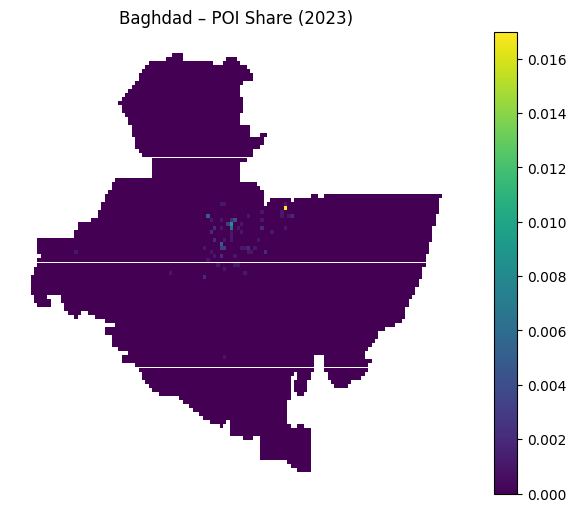

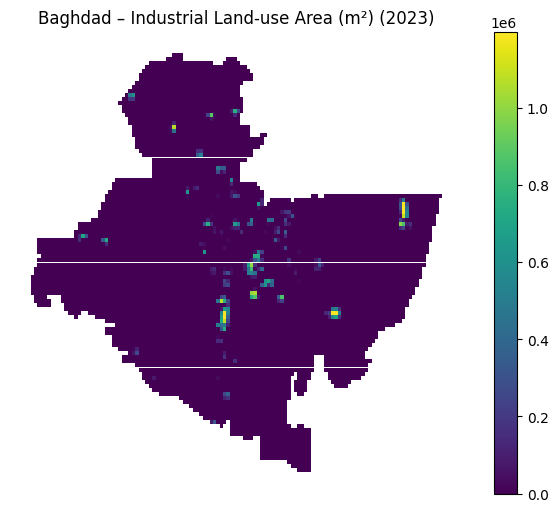

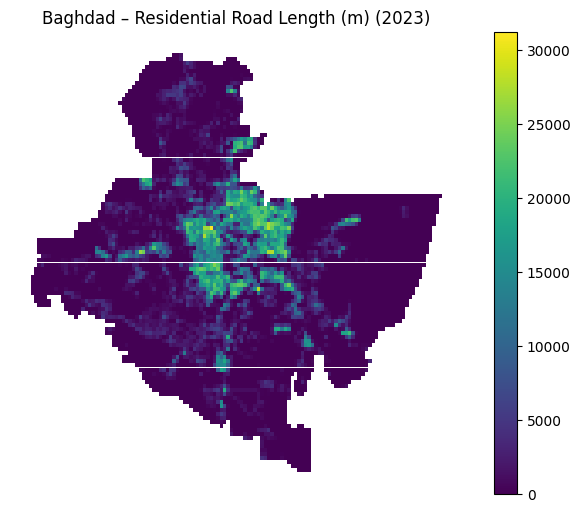

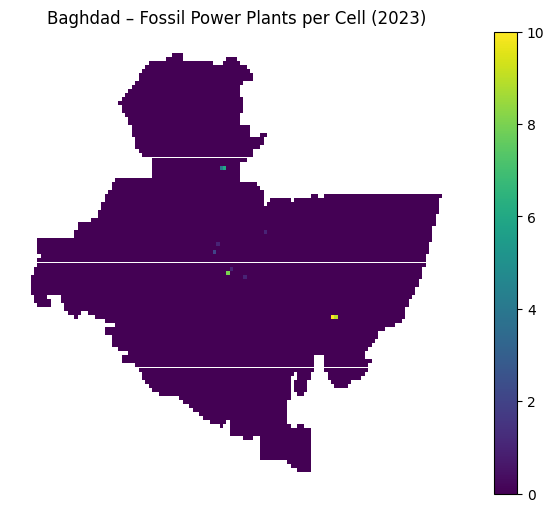

<Axes: title={'center': 'Baghdad – Fossil Power Plants per Cell (2023)'}>

In [12]:
# ─── Load the single Baghdad mesh ────────────────────────────────────────────
gdf_bag = gpd.read_file(demo_dir / "baghdad-2023-01-01.gpkg")

# POI Share
plot_mesh(
    mesh    = gdf_bag,
    feature = "poi_share",
    title   = "Baghdad – POI Share (2023)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land‐use Area
plot_mesh(
    mesh    = gdf_bag,
    feature = "lu_industrial_area",
    title   = "Baghdad – Industrial Land‐use Area (m²) (2023)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: Residential Road Length ───────────────────────────────────────────
plot_mesh(
    mesh    = gdf_bag,
    feature = "road_residential_len",
    title   = "Baghdad – Residential Road Length (m) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: # of Fossil Power Plants per Cell ─────────────────────────────────
plot_mesh(
    mesh    = gdf_bag,
    feature = "fossil_pp_count",
    title   = "Baghdad – Fossil Power Plants per Cell (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)


## 2 Population Data

### 2.1 Custom Fuctions

In [3]:
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

### 2.2 Aggregate Based on Mesh Grid & Visualization

#### Ethiopia - Addis Ababa

In [4]:
output_root = DATA_PATH / "eth-pop-gpkg"          # path for saving the data
eth_pop_path = DATA_PATH / 'eth-pop'

aggregate_pop_data(
    data_tiff_path=eth_pop_path,
    mesh_path=mesh_addis,
    layer_name=lyr_addis_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2024.gpkg


In [5]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2023" in f.name]

# Print the count
print(f"There are {len(gpkg_files_2023_eth)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2024" in f.name]

# Print the count
print(f"There are {len(gpkg_files_2024_eth)} files from the year 2024.")


There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [6]:
# Input file paths
src_2023_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH

# Run for 2023 and 2024
generate_daily_files(src_2023_eth, 2023, 365, "addis-ababa", output_path)
generate_daily_files(src_2024_eth, 2024, 366, "addis-ababa", output_path)


Done: 365 files created for 2023.
Done: 366 files created for 2024.


#### Visualization

Demonstrate Addis Ababa population mesh in 2023 and 2024.

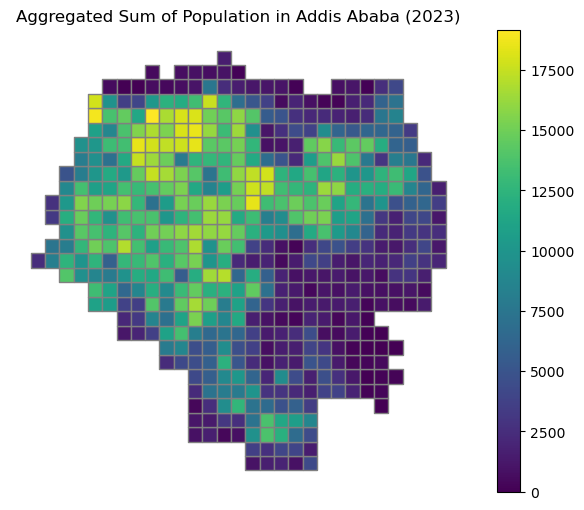

In [7]:
pop_2023_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2023)")
plt.show()

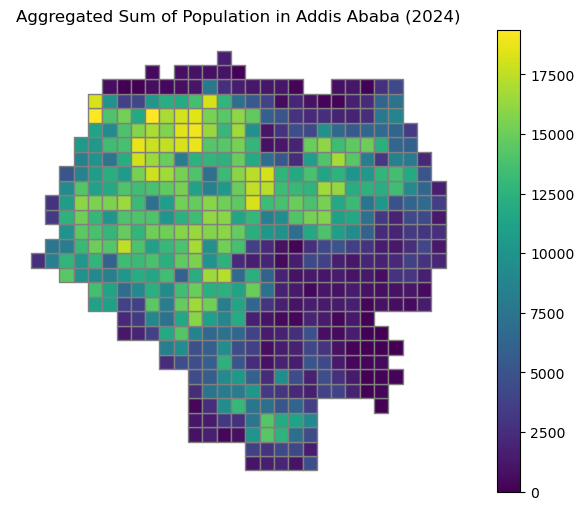

In [8]:
pop_2024_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2024)")
plt.show()

#### Iraq - Baghdad

In [9]:
output_root = DATA_PATH / "iraq-pop-gpkg"          # path for saving the data
iraq_pop_path = DATA_PATH / 'iraq-pop'

aggregate_pop_data(
    data_tiff_path=iraq_pop_path,
    mesh_path=mesh_baghdad,
    layer_name=lyr_baghdad_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2024.gpkg


In [10]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2023" in f.name]

# Print the count
print(f"There are {len(gpkg_files_2023_iraq)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2024" in f.name]

# Print the count
print(f"There are {len(gpkg_files_2024_iraq)} files from the year 2024.")

There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [11]:
# Input file paths
src_2023_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH 

# Run for 2023 and 2024
generate_daily_files(src_2023_iraq, 2023, 365, "baghdad", output_path)
generate_daily_files(src_2024_iraq, 2024, 366, "baghdad", output_path)

Done: 365 files created for 2023.
Done: 366 files created for 2024.


#### Visualization

Demonstrate Baghdad population mesh in 2023 and 2024.

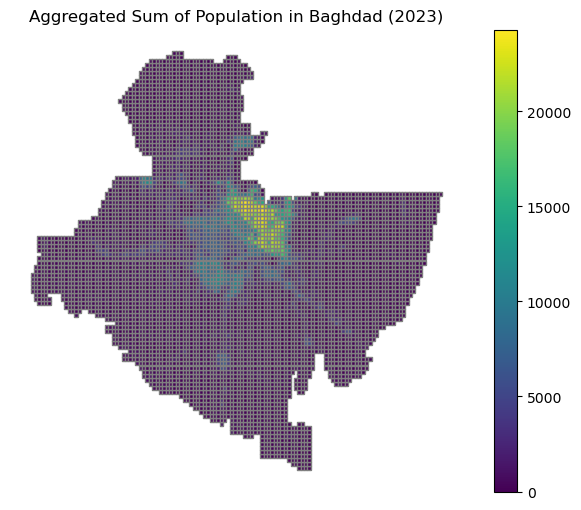

In [12]:
pop_2023_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2023)")
plt.show()

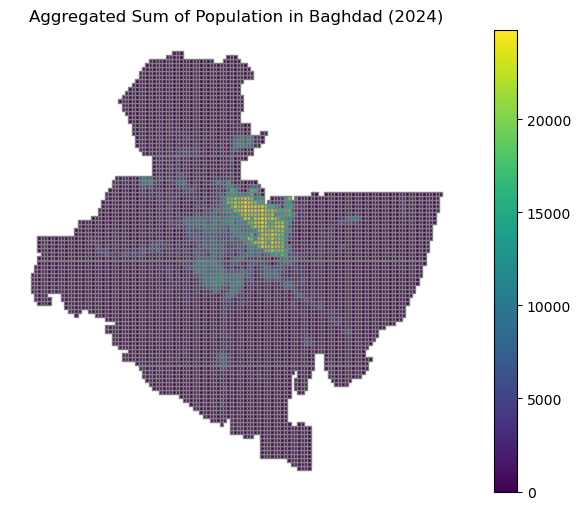

In [13]:
pop_2024_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2024)")
plt.show()